

## Regresion Polinomial


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Regresión Polinomial

In [4]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [5]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

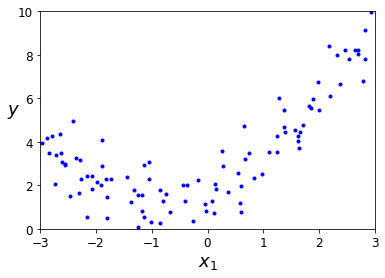

In [6]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [9]:
from sklearn.preprocessing import PolynomialFeatures


In [25]:
poly_features = PolynomialFeatures(degree=100)


In [26]:
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [27]:
X_poly[0]

array([ 1.00000000e+00, -7.52759287e-01,  5.66646544e-01, -4.26548448e-01,
        3.21088306e-01, -2.41702204e-01,  1.81943579e-01, -1.36959719e-01,
        1.03097700e-01, -7.76077513e-02,  5.84199555e-02, -4.39761640e-02,
        3.31034659e-02, -2.49189414e-02,  1.87579645e-02, -1.41202320e-02,
        1.06291358e-02, -8.00118067e-03,  6.02296306e-03, -4.53384137e-03,
        3.41289120e-03, -2.56908555e-03,  1.93390300e-03, -1.45576345e-03,
        1.09583945e-03, -8.24903326e-04,  6.20953639e-04, -4.67428619e-04,
        3.51861234e-04, -2.64866811e-04,  1.99380952e-04, -1.50085863e-04,
        1.12978527e-04, -8.50456357e-05,  6.40188921e-05, -4.81908156e-05,
        3.62760840e-05, -2.73071591e-05,  2.05557176e-05, -1.54735073e-05,
        1.16478263e-05, -8.76800945e-06,  6.60020054e-06, -4.96836226e-06,
        3.73998083e-06, -2.81530530e-06,  2.11924721e-06, -1.59528302e-06,
        1.20086411e-06, -9.03961610e-07,  6.80465497e-07, -5.12226722e-07,
        3.85583422e-07, -

In [28]:
from sklearn.linear_model import LinearRegression


In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)


LinearRegression()

In [30]:
lin_reg.intercept_, lin_reg.coef_

(array([2.9298604]),
 array([[-4.85764693e-33,  1.79863636e-33, -7.71874906e-34,
         -4.98701341e-34,  1.16239994e-34,  8.70865157e-35,
         -2.06833923e-35, -2.74377307e-35,  6.90826004e-36,
         -3.15685107e-35, -2.15908122e-35, -3.52856293e-34,
          2.31767172e-33,  1.58180494e-32,  1.22547190e-32,
         -1.98796518e-33, -9.93950578e-59, -4.03108935e-58,
          9.37391982e-57, -1.01839163e-56,  5.54870507e-56,
         -6.18922229e-56,  3.29550863e-55, -3.76012245e-55,
          1.96159946e-54, -2.28250473e-54,  1.16899956e-53,
         -1.38353150e-53,  6.96848122e-53, -8.36810120e-53,
          4.15161972e-52, -5.04669650e-52,  2.47008102e-51,
         -3.03255012e-51,  1.46653461e-50, -1.81427911e-50,
          8.68244294e-50, -1.07985055e-49,  5.12203349e-49,
         -6.38914595e-49,  3.00864785e-48, -3.75473356e-48,
          1.75831080e-47, -2.18969607e-47,  1.02156325e-46,
         -1.26599784e-46,  5.89531150e-46, -7.24864505e-46,
          3.3761055

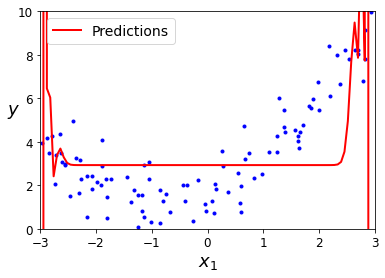

In [31]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

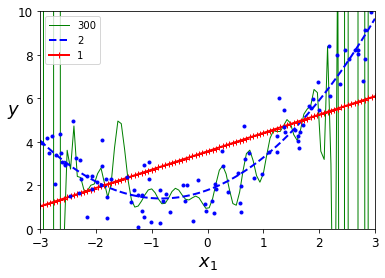

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict =  model.predict( X_train[:m])
        y_val_predict =   model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict,squared=False))
        val_errors.append(mean_squared_error(y_val, y_val_predict,squared=False))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

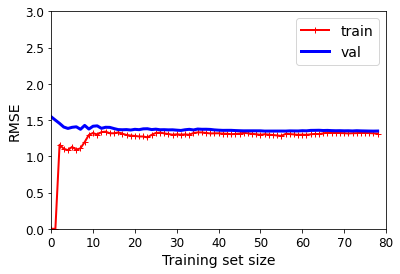

In [42]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
plt.show()                                      # not shown

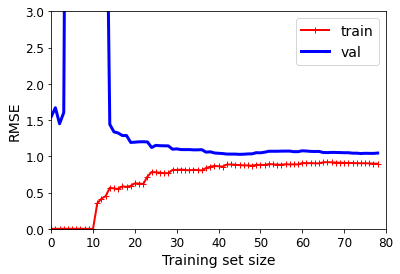

In [43]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
plt.show()                        # not shown